In [18]:
import pandas as pd
import numpy as np

In [2]:
names1880 = pd.read_csv('./pydata-book-master/ch02/names/yob1880.txt',names=['name','sex','births'])

In [3]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
# 根据性别统计出生人数
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
# 将多个文本文件组装成一个，用pandas的concat
years = range(1880, 2011)
pieces = []
columns = ['name','sex','births']

In [6]:
for year in years:
    path = './pydata-book-master/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
# 将所有数据整合到单个DataFrame中,concat默认是按行将多个dataframe组合
names = pd.concat(pieces, ignore_index=True)

In [7]:
frame.head()

,name,sex,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [9]:
# 根据性别，出生年份聚合
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


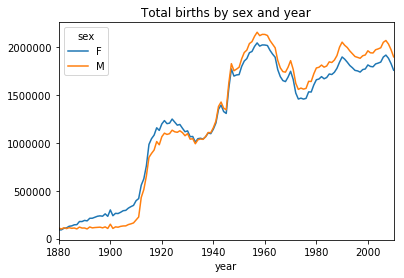

In [26]:
# 加这句话才能画出来，出生的男女数量对比，可看出男女还是很平均的
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [15]:
# prop是存放指定名字的婴儿数相对于总出生数的比例，比例小，说明同名的少了，多种名字的总数多了，名字多样性多了。
def add_prop(group):
    # 整数除法向下圆整
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [16]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [19]:
# 检查prop分组总计值接近1
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [20]:
# 取出每对sex/year组合的前1000个名字
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [27]:
boys = top1000[top1000.sex == 'M']

In [29]:
boys.head()

name sex  births  year      prop
year sex                                         
1880 M   942     John   M    9655  1880  0.087381
         943  William   M    9533  1880  0.086277
         944    James   M    5927  1880  0.053641
         945  Charles   M    5348  1880  0.048401
         946   George   M    5126  1880  0.046392

In [30]:
girls = top1000[top1000.sex == 'F']
girls.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [31]:
# 生成一张按year和name统计的总出生数透视表
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [32]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [33]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13594fef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b8893c8>], dtype=object)

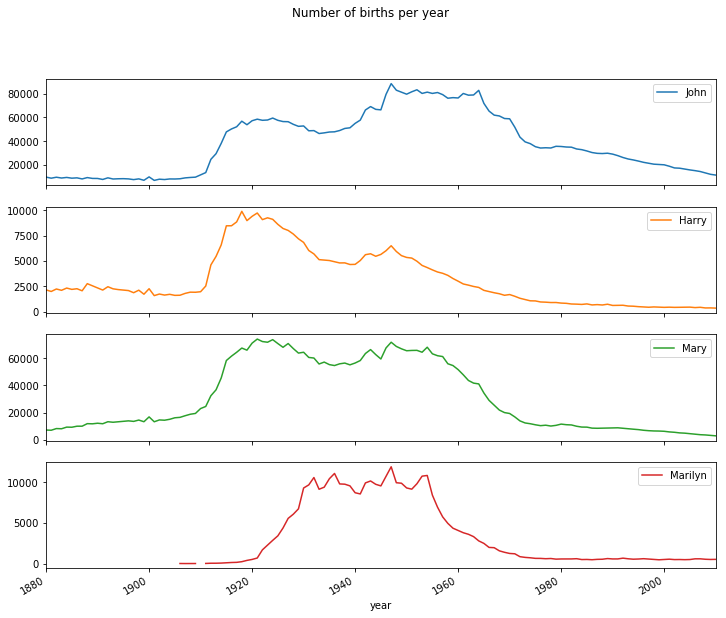

In [34]:
# 在绘图命令中加入subplots=True参数，则会将DataFrame当中的每一列结果绘制到一个子图片中
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")
# 几个男孩女孩名名字随时间变化的使用数量，说明这几个名字已经不受欢迎了，父母给小孩取常见名越来越少了

In [35]:
table = top1000.pivot_table('prop',index='year',columns='sex', aggfunc=sum)

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


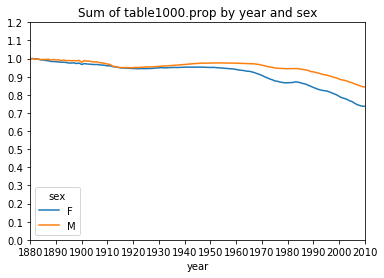

In [36]:
# 前1000项比例降低说明名字多样性确实增长了
table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [37]:
# 只考虑2010年的男孩名字
df =boys[boys.year ==2010]

In [38]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [50]:
# 要想知道多少个名字加起来才够50%,统计prop和cumsum
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [51]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [53]:
# 数组索引是0开始，所以最终结果是117
prop_cumsum.searchsorted(0.5)

array([116])

In [143]:
# 我们再拿1900年的数据比较
df = boys[boys.year == 2010]
in1900 = df.sort_index(by='prop',ascending='False').prop.cumsum()
in1900.searchsorted(0.5)[0]

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


944

In [136]:
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1
#注意！！！这里和书本不一样，上面看到python3的searchsorted()返回的是ndarray类型
#需要先取[0]元素，才能获得想要的数据，如果不作该处理，绘图会报错

In [137]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [138]:
# dataframe无法画，转成Series才能画
diversity = diversity.unstack('sex')
#依靠sex入栈操作，变Series为DataFrame

In [139]:
type(diversity)

pandas.core.frame.DataFrame

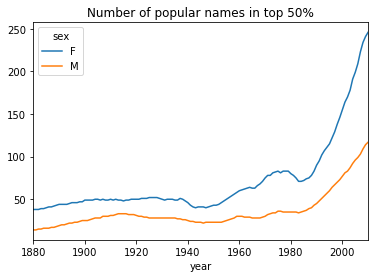

In [140]:
diversity.plot(title="Number of popular names in top 50%")

In [145]:
# 需求：近百年，男孩名字最后一个字母发生显著变化，探究原因
# 从name列取出最后一个字母
get_last_letter = lambda x:x[-1]

In [150]:
last_letters = names.name.map(get_last_letter)
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [151]:
last_letters.name = 'last_letter'

In [152]:
last_letters.head()

0    y
1    a
2    a
3    h
4    e
Name: last_letter, dtype: object

In [153]:
table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)

In [155]:
# 选出几年，输出前面几行
subtable = table.reindex(columns=[1910,1960,2010],level = 'year')

In [156]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [157]:
# 总出生人数
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [158]:
# 各性别各末字母占总出生人数
letter_prop = subtable/subtable.sum().astype(float)

In [160]:
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

In [161]:
import matplotlib.pyplot as plt

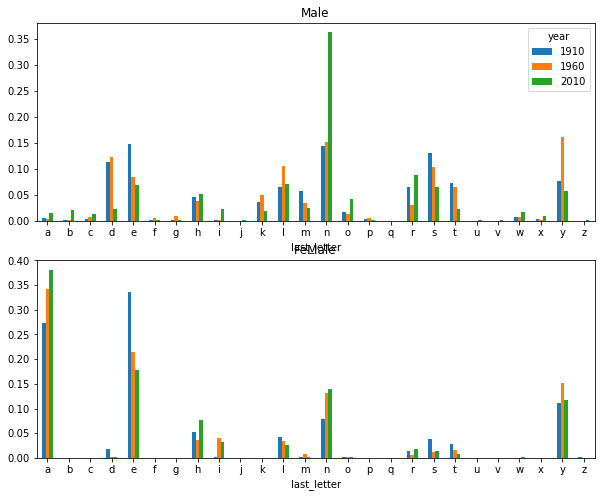

In [163]:
# 男孩女孩名字中末字母比例
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='FeMale',legend=False)

In [167]:
# 从上图可以看出，从20世纪60年代开始，以字母“n”结尾的男孩子名字出现显著的增长。
# 回到之前创建的那个完整表，按年度和性别对其进行规范化处理，并在男孩子名字中选出几个字母，最后进行转置以便将各个列做成一个时间序列：
letter_prop = table / table.sum()

dny_ts = letter_prop.ix[['d','n','y'],'M'].T

dny_ts.head()

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [168]:
letter_prop.head()

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2001   
last_letter                                            ...                
a            0.339703  0.335258  0.332764  0.328706    ...     0.020162   
b                 NaN       NaN       NaN       NaN    ...     0.026256   
c                 NaN       NaN       NaN       NaN    ...     0.013972   
d            0.006967  0.007035  0.007266  0.007703    ...     0.031352   
e            0.372802  0.372324  0.373675  0.373736    ...     0.074927   

sex                                                                      \
year             2002      2003      2004      2005      2006      2007   
last_letter                                                               
a            0.020019  0.019177  0.019505  0.018481  0.017635  0.016747   
b            0.025418  0.024368  0.023171  0.021645  0.020778  0.020357   
c            0.014048  0.014042  0.013514  0.013083  0.012991  0.012983   
d            0.028794  0.027069  0.026118  0.025420  0.025075  0.024451   
e            0.074603  0.073396  0.071710  0.070799  0.069748  0.069445   

sex                                        
year             2008      2009      2010  
last_letter                                
a            0.016189  0.015927  0.014980  
b            0.019655  0.019693  0.020470  
c            0.012458  0.012186  0.012181  
d            0.023574  0.023398  0.023387  
e            0.069362  0.068663  0.067959  

[5 rows x 262 columns]

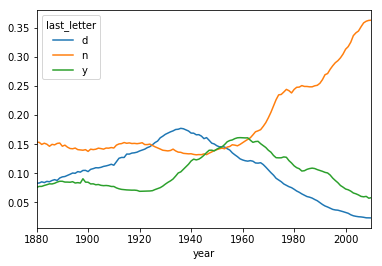

In [169]:
# 有了这个时间序列的DataFrame之后，就可以通过其plot方法绘制出一张趋势图了：
dny_ts.plot()

变成女孩名字的男孩名字（以及相反的情况） 
另一个有趣的趋势是，早年流行于男孩的名字近年来“变形了”，例如Lesley或Leslie。回到top1000数据集，找出其中以“lesl”开头的一组名字：

In [171]:
all_names = top1000.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Yousef', 'Joziah', 'Maxton'], dtype=object)

In [173]:
mask = np.array(['lesl' in x.lower() for x in all_names])
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [174]:
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

然后利用这个结果过滤其他的名字，并按名字分组计算出生数已查看相对频率：

In [178]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.head()

name sex  births  year      prop
year sex                                         
1880 F   654   Leslie   F       8  1880  0.000088
     M   1108  Leslie   M      79  1880  0.000715
1881 F   2523  Leslie   F      11  1881  0.000120
     M   3072  Leslie   M      92  1881  0.000913
1882 F   4593  Leslie   F       9  1882  0.000083

In [179]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

接下来，我们按性别和年度进行聚合，并按年度进行规范化处理：

In [186]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
table.head()

/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/tanchengjun/anaconda3/envs/spider/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [188]:
# sum(1)就是行相加
table.sum(1).head()

year
1880     87.0
1881    103.0
1882    137.0
1883    132.0
1884    140.0
dtype: float64

In [184]:
# 整除 例如第一个数是 8/87=0.091954 79/87=0.908046
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


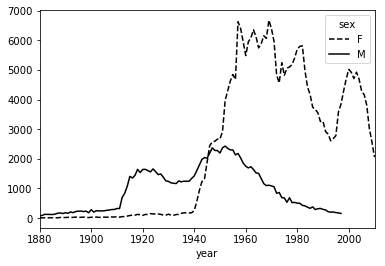

In [189]:
table.plot(style={'M':'k-','F':'k--'})